# **Proyek Analisis Data : Bike Sharing Dataset**
* **Nama :** Intan Permata Wardhaningsih
* **Email:** intanwardhaningsih02@gmail.com
* **ID Dicoding :** haintana

##**Question :**
1. What is the difference in bicycle use between weekdays and weekends?
2. How many bicycle users each year?

##**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### **1. Gathering Data**

In [ ]:
# Directory containing the CSV files
day = pd.read_csv('/content/day.csv')
print(day.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [ ]:
# Select the column that will be used to differentiate weekdays and weekends
working_holiday= day[['dteday', 'holiday', 'workingday', 'cnt']]
print(working_holiday.head())

       dteday  holiday  workingday   cnt
0  2011-01-01        0           0   985
1  2011-01-02        0           0   801
2  2011-01-03        0           1  1349
3  2011-01-04        0           1  1562
4  2011-01-05        0           1  1600


In [ ]:
# Select the column to use to analyze usage each year
yearly_trend = day[['dteday', 'yr', 'cnt']]
print(yearly_trend.head())

       dteday  yr   cnt
0  2011-01-01   0   985
1  2011-01-02   0   801
2  2011-01-03   0  1349
3  2011-01-04   0  1562
4  2011-01-05   0  1600


### **2. Assessing Data**

In [ ]:
# Check data type 'day'
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Check for missing values ​​in 'Day Dataset'
print(day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
# Check day duplication
print("Jumlah duplikat day : ",day.duplicated().sum())

Jumlah duplikat day :  0


### **3. Cleaning Data**

In [ ]:
# Change the format of 'dteday' column to date format
day['dteday'] = pd.to_datetime(day['dteday'])

In [ ]:
# Added 'year' column
day['year'] = day['dteday'].dt.year

In [ ]:
# Check missing values
print(day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
year          0
dtype: int64


In [ ]:
# Hande missing values ​​with median
day['cnt'].fillna(day['cnt'].mean(), inplace=True)  # Mengisi missing value dengan rata-rata

<ipython-input-17-1b0b7904c52d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day['cnt'].fillna(day['cnt'].mean(), inplace=True)  # Mengisi missing value dengan rata-rata


In [ ]:
# Check duplication
print("Jumlah duplikat dalam dataset:", day.duplicated().sum())

Jumlah duplikat dalam dataset: 0


In [ ]:
# Delete duplication
day.drop_duplicates(inplace=True)

In [ ]:
# Filter data for 2011 and 2012
yearly_trend_filtered = yearly_trend[(yearly_trend['yr'] == 0) | (yearly_trend['yr'] == 1)]

In [ ]:
# Check unique values ​​in the category column
print(day['holiday'].unique())
print(day['workingday'].unique())

[0 1]
[0 1]


In [ ]:
# Double check the dataset information after cleaning
print(day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  year        731 non-null  

## **Exploratory Data Analysis (EDA)**

### **1. Explore Data Day**


In [ ]:
# Average bicycle users by 'day'
usage_by_day_type = day.groupby('holiday')['cnt'].mean().reset_index()
print("Rata-rata pengguna sepeda pada Weekday dan Weekend:\n", usage_by_day_type)

Rata-rata pengguna sepeda pada Weekday dan Weekend:
    holiday          cnt
0        0  4527.104225
1        1  3735.000000


In [ ]:
# Total bicycle users by 'day'
total_usage_by_day_type = day.groupby('holiday')['cnt'].sum().reset_index()
print("Total pengguna sepeda pada Weekday dan Weekend:\n", total_usage_by_day_type)

Total pengguna sepeda pada Weekday dan Weekend:
    holiday      cnt
0        0  3214244
1        1    78435


In [ ]:
# Average bicycle users per year
yearly_trend = day.groupby('year')['cnt'].mean().reset_index()
print("Rata-rata pengguna sepeda per tahun:\n", yearly_trend)

Rata-rata pengguna sepeda per tahun:
    year          cnt
0  2011  3405.761644
1  2012  5599.934426


In [ ]:
# Total bicycle users per year
total_users_per_year = day.groupby('year')['cnt'].sum().reset_index()
print("Total pengguna sepeda per tahun:\n", total_users_per_year)

Total pengguna sepeda per tahun:
    year      cnt
0  2011  1243103
1  2012  2049576


In [ ]:
# Calculate the number of bicycle users each year
total_users_per_year['change'] = total_users_per_year['cnt'].diff()
total_users_per_year['change'].fillna(0, inplace=True)
print("Jumlah pengguna sepeda per Tahun:\n", total_users_per_year)

Jumlah pengguna sepeda per Tahun:
    year      cnt    change
0  2011  1243103       0.0
1  2012  2049576  806473.0


<ipython-input-27-d9581164e636>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total_users_per_year['change'].fillna(0, inplace=True)


## **Visualization & Explanatory Analysis**

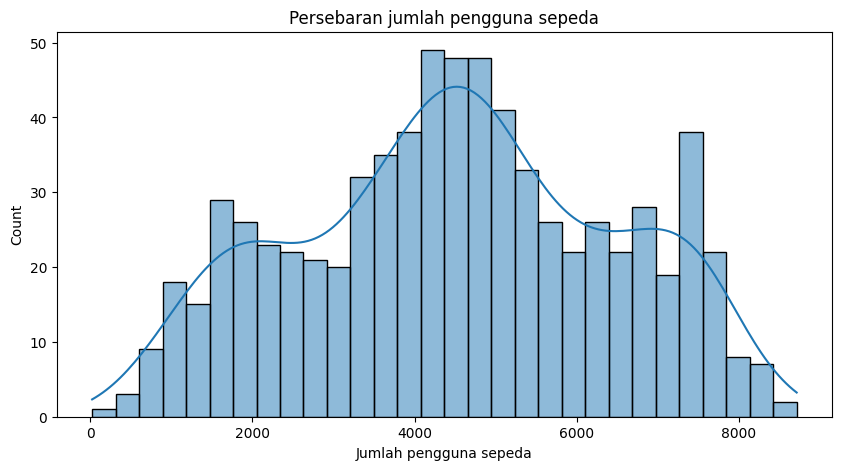

In [ ]:
# Histogram of the number of bicycle users
plt.figure(figsize=(10,5))
sns.histplot(day['cnt'], bins=30, kde=True)
plt.xlabel('Jumlah pengguna sepeda')
plt.title('Persebaran jumlah pengguna sepeda')
plt.show()

### **Question 1 : What is the difference in bicycle use between weekdays and weekends?**

<ipython-input-29-06c25db85c6f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='cnt', data=usage_by_day_type, palette='muted')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


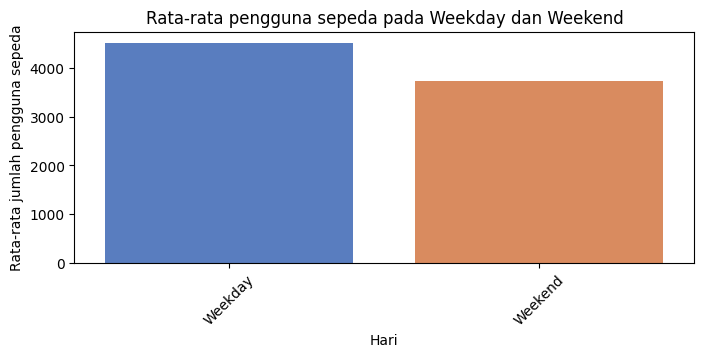

In [ ]:
# Visualization of average bicycle users by 'day'
plt.figure(figsize=(8, 3))
sns.barplot(x='holiday', y='cnt', data=usage_by_day_type, palette='muted')
plt.title('Rata-rata pengguna sepeda pada Weekday dan Weekend')
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=45)
plt.ylabel('Rata-rata jumlah pengguna sepeda')
plt.xlabel('Hari')
plt.show()

<ipython-input-30-550bb3685956>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='cnt', data=total_usage_by_day_type, palette='muted')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


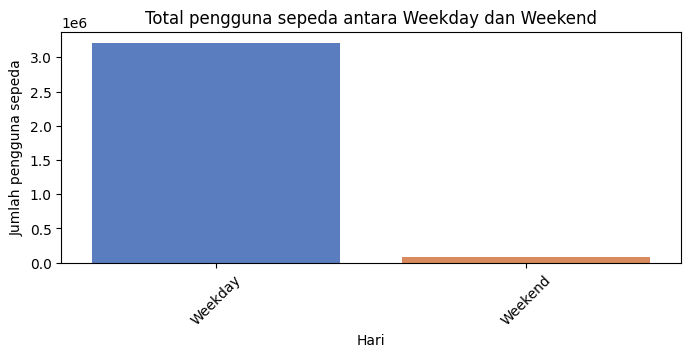

In [ ]:
# Visualization of total bicycle users by 'day'
plt.figure(figsize=(8, 3))
sns.barplot(x='holiday', y='cnt', data=total_usage_by_day_type, palette='muted')
plt.title('Total pengguna sepeda antara Weekday dan Weekend')
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=45)
plt.ylabel('Jumlah pengguna sepeda')
plt.xlabel('Hari')
plt.show()

### **Question 2 : How many bicycle users each year?**

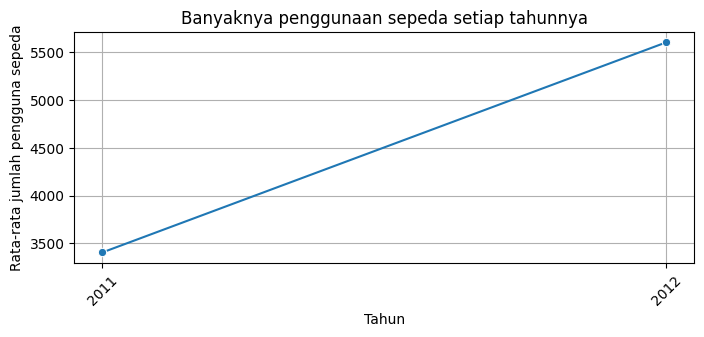

In [ ]:
# Visualization of average bicycle users per year
plt.figure(figsize=(8, 3))
sns.lineplot(x='year', y='cnt', data=yearly_trend, marker='o')
plt.title('Banyaknya penggunaan sepeda setiap tahunnya')
plt.ylabel('Rata-rata jumlah pengguna sepeda')
plt.xlabel('Tahun')
plt.xticks(yearly_trend['year'], rotation=45)
plt.grid()
plt.show()

<ipython-input-32-dbebd839a241>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='cnt', data=total_users_per_year, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


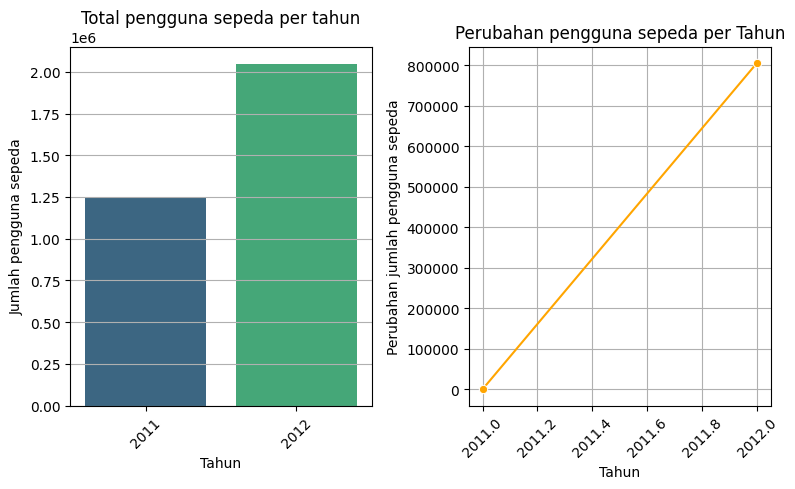

In [ ]:
# Visualization of total bicycle users per year
plt.figure(figsize=(8, 5))

# Subplot for total users
plt.subplot(1, 2, 1)
sns.barplot(x='year', y='cnt', data=total_users_per_year, palette='viridis')
plt.title('Total pengguna sepeda per tahun')
plt.ylabel('Jumlah pengguna sepeda')
plt.xlabel('Tahun')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Subplot untuk change
plt.subplot(1, 2, 2)
sns.lineplot(x='year', y='change', data=total_users_per_year, marker='o', color='orange')
plt.title('Perubahan pengguna sepeda per Tahun')
plt.ylabel('Perubahan jumlah pengguna sepeda')
plt.xlabel('Tahun')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## **Conclusion**

### **Questation 1 : What is the difference in bicycle use between weekdays and weekends?**
Bicycle usage is higher on weekdays compared to weekends, suggesting that bicycles are more commonly used for commuting to work or school than for recreational purposes.

### **Questation 2 : How many bicycle users each year?**
There is a positive trend in bicycle usage, with a significant increase in the number of users year by year. This suggests growing popularity, likely due to factors like improved cycling infrastructure and environmental campaigns.
